# MNIST VAE Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from itertools import product
from scipy.stats import norm

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist, load_model

Using TensorFlow backend.


In [3]:
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
RUN_FOLDER

'run/vae/0002_digits'

# Load MNIST data

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist()

# Load Trained Model

In [5]:
VAE = load_model(VariationalAutoencoder, RUN_FOLDER)

# reconstruct original images

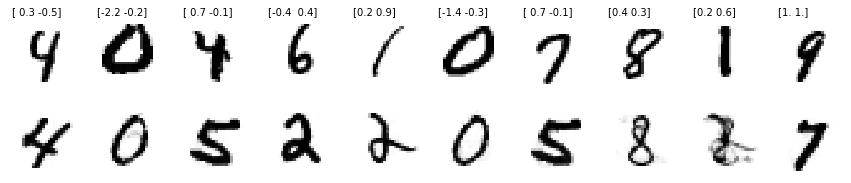

In [6]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = VAE.encoder.predict(example_images)

reconst_images = VAE.decoder.predict(z_points)

fig,ax = plt.subplots(2, n_to_show, figsize=(15, 3))
for i in range(n_to_show):
    ax[0][i].axis('off')
    img = example_images[i].squeeze()
    ax[0][i].imshow(img, cmap='gray_r')
    ax[0][i].text(1.5, -1, str(np.round(z_points[i],1)), fontsize=10)#, ha='center', transform=ax[0][i].transAxes)
    
for i in range(n_to_show):
    ax[1][i].axis('off')
    img = reconst_images[i].squeeze()
    ax[1][i].imshow(img, cmap='gray_r')

# Mr N. Coders  wall

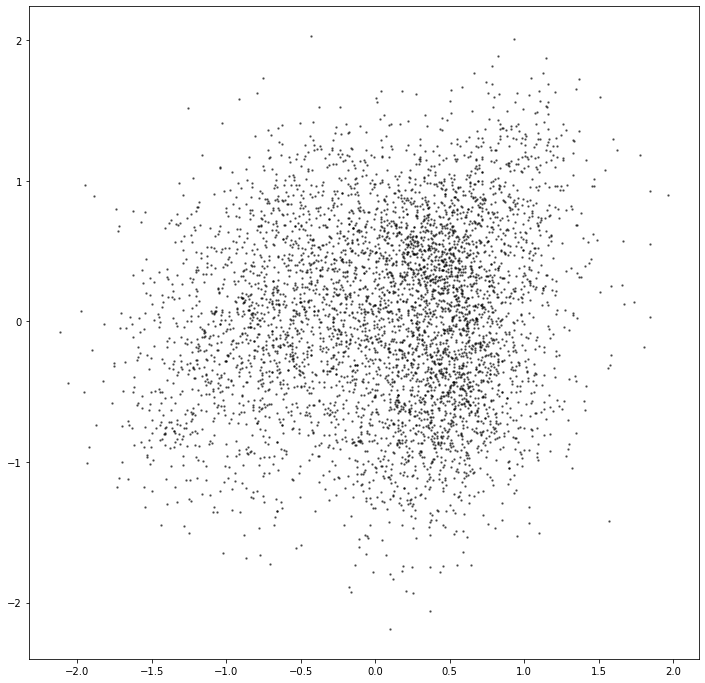

In [7]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = VAE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

# The new generated art exhibition

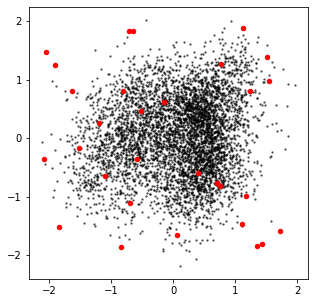

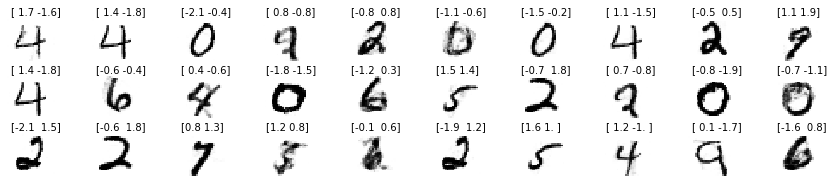

In [9]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

num_pts = 30
figsize = 15

x = np.random.uniform(min_x,max_x, size = num_pts)
y = np.random.uniform(min_y,max_y, size = num_pts)
z_grid = np.array(list(zip(x, y)))
reconst = VAE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()


num_cols = 10
num_rows = np.ceil(num_pts/num_cols).astype(np.int)
fig,ax = plt.subplots(num_rows, num_cols, figsize=(15, 3))
rows, cols = np.arange(num_rows), np.arange(num_cols)
for row,col in product(rows,cols):
    ind = row*num_cols + col
    ax[row][col].axis('off')
    img = reconst[ind, :,:,:].squeeze()
    ax[row][col].imshow(img, cmap='gray_r')
    ax[row][col].text(1.5, -1, str(np.round(z_grid[ind],1)), fontsize=10)  

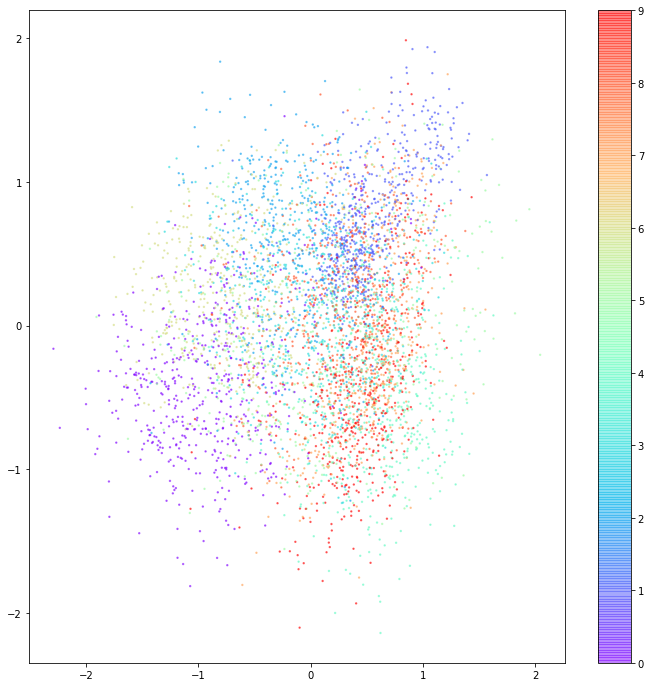

In [10]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = VAE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.show()

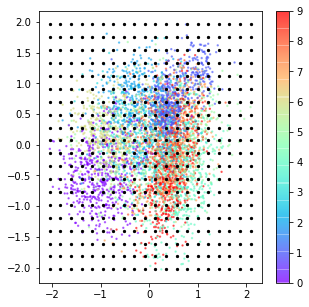

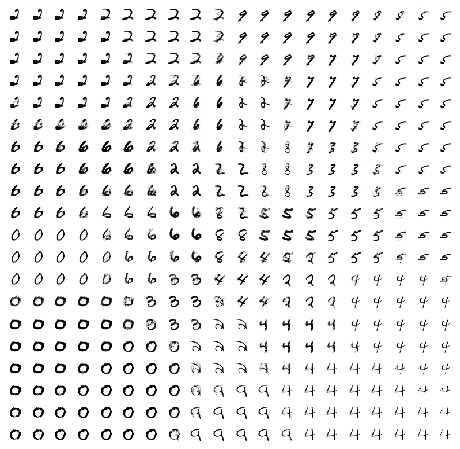

In [11]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = VAE.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = VAE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

In [12]:
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)

In [13]:
x.shape

(20,)

In [16]:
xv,yv = np.meshgrid(x,y)
xv.shape, yv.shape

((20, 20), (20, 20))